<div id="titre">
<h1 style="font-size:500%">Temps d'attente entre 2 séimes de magnitude 6</h1>
<div style="font-family:Comic Sans MS; background-color:black;box-shadow: 8px 8px 0px #aaa; text-align:center; width: 50%; color:white">Bro Frédéric - PFC - Liban - 20 janvier 2020</div>
</div>

L'USGS fournit des données sur les tremblements de terre survenus dans le monde à l'adresse https://earthquake.usgs.gov/earthquakes/search/ . 
<br> Le fichier <code>'earthquakes.csv'</code> contient les données concernant tous les séimes qui se sont produits en 2014.

<div id="table" style="border:solid; background-color:#86BC98;box-shadow: 8px 8px 0px #aaa">
    <p style="font-family:Comic Sans MS"><u>Table des matières :</u></p>
<p style="font-family:Arial Black;font-size:100%; color:black">1 - <a href="#section1" style="font-family:Comic Sans MS">Traitement des données avec Pandas</a></p>
<p style="font-family:Arial Black; font-size:100%; color:black">2 - <a href="#section2" style="font-family:Comic Sans MS">Création de la colonne des temps d'attentes entre 2 séismes consécutifs de magnétude $\geqslant6$</a></p>
<p style="font-family:Arial Black; font-size:100%; color:black">3 - <a href="#section3" style="font-family:Comic Sans MS">Modélisation du temps d'attente entre 2 séismes consécutifs de magnétude $\geqslant6$</a></p>
</div>

<div id="section1">
<blockquote id="section">Traitement des données avec Pandas</blockquote>
<a href="#table"; style="text-align: right;">Retour table des matières</a>
</div>

In [1]:
import pandas as pa 
import pylab as pl
import seaborn as sns
pl.style.use('bmh')

In [2]:
T = pa.read_csv('earthquakes_2014.csv')
T.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,pays
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada


<div id="section2">
<blockquote id="section">Création de la colonne des temps d'attentes entre 2 séismes consécutifs de magnétude $\geqslant6$</blockquote>
<a href="#table"; style="text-align: right;">Retour table des matières</a>
</div>

- Trions la table <code>T</code> en rangeant les dates de <code>time</code> de la plus petite à la plus grande

In [3]:
T.sort_values('time', inplace=True)
T['time'] = pa.to_datetime(T['time'])

- Sélectionnons  les séismes de  <code>T</code> de magnétude $\geqslant6$.

In [4]:
F = T.query('mag >=6')

- Créons la colonne des temps d'attentes entre 2 séismes consécutifs.

In [5]:
F.time.diff()

9062                         NaT
5894     11 days 11:57:34.240000
3592      6 days 22:51:41.110000
3308      0 days 22:36:22.650000
2211      4 days 03:45:11.510000
1805      1 days 08:41:23.700000
17995     5 days 14:03:01.780000
17606     1 days 05:27:53.830000
17397     0 days 17:42:08.370000
15979     4 days 05:31:27.360000
15147     2 days 06:16:25.560000
14025     2 days 18:23:09.950000
12142     6 days 00:07:24.060000
9751      8 days 11:46:26.990000
27118     3 days 12:24:14.730000
26972     0 days 10:33:28.590000
26941     0 days 02:05:50.970000
26230     2 days 11:39:43.440000
24887     4 days 19:21:15.560000
24605     0 days 21:25:52.430000
24404     0 days 19:19:03.980000
23906     1 days 19:03:40.960000
23368     1 days 15:52:31.090000
23198     0 days 14:52:11.110000
22968     0 days 21:24:56.630000
22843     0 days 07:55:05.260000
21508     4 days 08:29:34.620000
21133     0 days 23:18:49.670000
20764     1 days 05:20:02.780000
19989     2 days 09:09:33.790000
          

- Eliminons le premier élément de la colonne précédente

In [6]:
F.time.diff().dropna()

5894     11 days 11:57:34.240000
3592      6 days 22:51:41.110000
3308      0 days 22:36:22.650000
2211      4 days 03:45:11.510000
1805      1 days 08:41:23.700000
17995     5 days 14:03:01.780000
17606     1 days 05:27:53.830000
17397     0 days 17:42:08.370000
15979     4 days 05:31:27.360000
15147     2 days 06:16:25.560000
14025     2 days 18:23:09.950000
12142     6 days 00:07:24.060000
9751      8 days 11:46:26.990000
27118     3 days 12:24:14.730000
26972     0 days 10:33:28.590000
26941     0 days 02:05:50.970000
26230     2 days 11:39:43.440000
24887     4 days 19:21:15.560000
24605     0 days 21:25:52.430000
24404     0 days 19:19:03.980000
23906     1 days 19:03:40.960000
23368     1 days 15:52:31.090000
23198     0 days 14:52:11.110000
22968     0 days 21:24:56.630000
22843     0 days 07:55:05.260000
21508     4 days 08:29:34.620000
21133     0 days 23:18:49.670000
20764     1 days 05:20:02.780000
19989     2 days 09:09:33.790000
19710     1 days 00:20:06.990000
          

- Chargeons les fonctions <code>timedelta64</code>, <code>exp</code> et <code>sqrt</code> du module <code>numpy</code>.

In [7]:
from numpy import timedelta64, exp, sqrt

- Evaluons ces temps d'attente en jour et stockons les résultats dans la variable <code>temps</code>.

In [8]:
temps = F.time.diff().dropna()/timedelta64(1, "D")
temps

5894      11.498313
3592       6.952559
3308       0.941929
2211       4.156383
1805       1.362080
17995      5.585437
17606      1.227706
17397      0.737597
15979      4.230178
15147      2.261407
14025      2.766087
12142      6.005140
9751       8.490590
27118      3.516837
26972      0.439914
26941      0.087395
26230      2.485919
24887      4.806430
24605      0.892968
24404      0.804907
23906      1.794224
23368      1.661471
23198      0.619573
22968      0.892322
22843      0.329922
21508      4.353873
21133      0.971408
20764      1.222254
19989      2.381641
19710      1.013970
            ...    
100311     5.408041
98089      6.424166
97927      0.535572
97602      0.981694
97597      0.012196
96979      2.002573
95913      3.052627
91301     13.975040
111148     4.322415
111052     0.331571
110805     0.930348
110631     0.646821
109305     3.781546
106828     6.284988
106285     1.671799
105466     1.834476
105173     0.763500
103919     3.720518
103439     1.123597


<div id="section3">
<blockquote id="section">Modélisation du temps d'attente entre 2 séismes consécutifs de magnétude $\geqslant6$</blockquote>
<a href="#table"; style="text-align: right;">Retour table des matières</a>
</div>

- Histogramme normalisé des fréquences de <code>temps</code>.

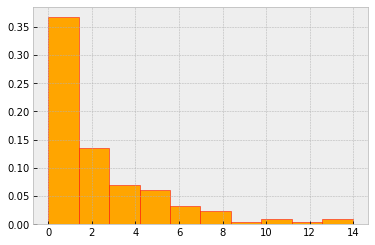

In [9]:
temps.hist(edgecolor='red',color='orange',density=True)

<div class="alert alert-danger">
    <p style="font-family:Arial Black">Ici :</p> 
<blockquote id="barrer">
    Essayons d'ajuster cet histogramme par une courbe de densité associée à une <b>loi exponentielle</b> de paramètre <code>a</code>

</blockquote>    
</div>

- Fonction <code>densite</code> de paramètre <code>a</code> qui permet de représenter la densité de probabilité d'une loi exponentielle de paramètre $a$.

In [10]:
def densite(a):
    t = [k/1000 for k in range(17000)]
    y = [a*exp(-a*x) for x in t]
    pl.plot(t,y,color='black')

- Conjecturons un intervalle possible des valeurs de $a$

In [11]:
from ipywidgets import interact

def plot(a):
    densite(a)
    temps.hist(edgecolor='red',color='orange',density=True)
    
interact(plot, a = (0.2,0.5,0.01))

interactive(children=(FloatSlider(value=0.34, description='a', max=0.5, min=0.2, step=0.01), Output()), _dom_c…

<function __main__.plot(a)>

<div class="alert alert-success" role="alert">
<p style="font-family:Arial Black">Que dire ?</p>
    <blockquote id="barrev">
        <ul>
            <li>Graphiquement, on propose $$a\in \left[ 0,40\, ;\, 0,44\right]$$</li>
            <li><b><u>On modélise</u></b> le temps d'attente entre 2 séismes consécutifs par une variable aléatoire $X$.<br> <b>Selon ce modèle</b>,  la <b>loi des grands nombres</b> dit que $$\mathbb{E}[X]\approx m$$ où $m$ est la moyenne des temps d'attentes observés dans <code>temps</code>.<br> Or $$\mathbb{E}[X]= \dfrac{1}{a}$$
            </li>
        </ul>
    </blockquote>
</div>

In [12]:
m = temps.mean()
a = 1/m
a

0.42398780174450196

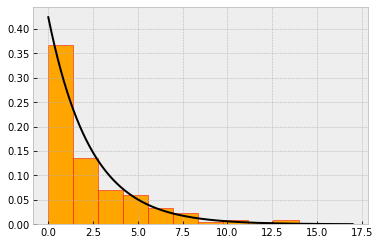

In [13]:
plot(a)

<div class="alert alert-info">
    <p style="font-family:Arial Black">Question :</p> 
    <blockquote id="barre">
    Calcul de $\mathbb{P}(X\leqslant 1)$
    </blockquote>    
</div>

In [14]:
1-exp(-a)

0.34556813521273744

<p style="color:blue;font-family:Comic Sans MS;background-color:white;font-size:200%;text-align:center;border-style:solid solid solid solid;padding:10px">Fini ... </p>
<p>
<a href="#titre"; style="text-align: right;">Retour au début</a>
</p>

In [15]:
from IPython.core.display import HTML
htm = open("style_css.txt").read()
HTML(htm)